# Facial Recognition Model Research

There are many open-source facial recognition models that we can choose from, depending on our project requirements and preferences. Some of the most popular and well-known ones are:

# DeepFace by Facebook:
 This is a 9-layer deep neural network that uses locally connected layers instead of convolutional layers. It can perform face verification, face recognition, facial attribute analysis, and real-time face analysis. It was trained on the Social Face Classification Dataset, with 4 million facial images. It achieved a prediction accuracy of 97.35% on the Labeled Faces in the Wild (LFW) dataset.


# FaceNet by Google:
 This is a 22-layer deep convolutional neural network with L2 normalization. It introduces the triplet loss function, which measures the similarity between faces in a Euclidean space. It can represent each face by a 128-dimensional byte vector, which enables scalable clustering and recognition. It was trained on a large dataset of 200 million images and 8 million identities. It achieved a prediction accuracy of 99.25% on the LFW dataset, and 95.12% on the YouTube Faces (YFD) dataset.
# Haar Cascade:
Haar Cascade is a machine learning-based approach for object detection, commonly used for face detection. It was proposed by Paul Viola and Michael Jones in their paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” in 2001. The algorithm is trained with positive and negative images to detect specific objects, such as faces. Haar features, which are similar to convolutional kernels, are used to extract features from the images. These features are then used to train a classifier to accurately distinguish between the object and non-object images.

Haar Cascade face detection is a fast and lightweight method that can be used even on resource-constrained devices. It can detect frontal faces and facial features such as eyes, nose, and mouth.

# Template code for all of these models

In [31]:
!pip install facelib


ERROR: Ignored the following versions that require a different python version: 1.0 Requires-Python >=3.5, <3.8; 1.1 Requires-Python >=3.5, <3.8; 1.2 Requires-Python >=3.5, <3.8; 1.2.1 Requires-Python >=3.5, <3.8
ERROR: Could not find a version that satisfies the requirement facelib (from versions: none)
ERROR: No matching distribution found for facelib


In [4]:
image_path=r".\photos\people (1).jpg"

1. Deepface

There is a face in the image.


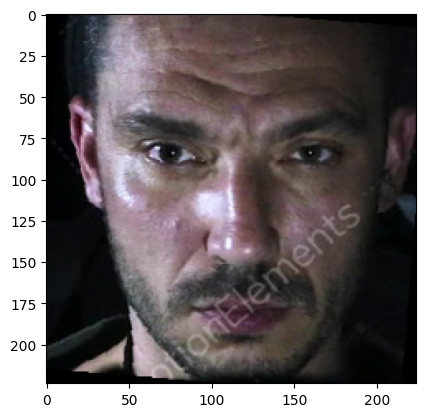

In [22]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

# Load an image of a person's face that you want to check
image = cv2.imread(image_path)

# Convert the image from BGR to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check if there is a face in the image using the DeepFace.extract_faces function
faces = DeepFace.extract_faces(img_path=image_path)

# If faces is not empty, then there is a face detected
if len(faces) > 0:
    print('There is a face in the image.')
    
    # Get the first detected face
    face = faces[0]['face']
    
    # Display the first detected face
    plt.imshow(face)
    plt.show()
else:
    print('There is no face in the image.')


2. FaceNet

There is a face in the image.


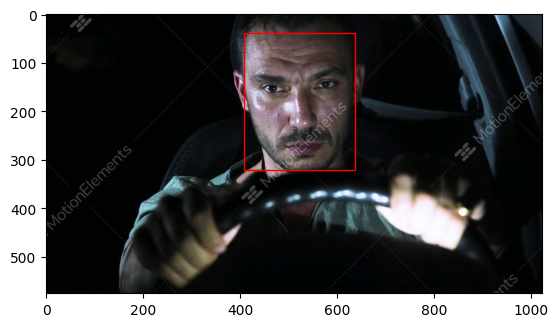

In [29]:
import cv2
import torch
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Initialize the face detector
face_detector = MTCNN()

# Load an image of a person's face that you want to check
image = cv2.imread(image_path)

# Convert the image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check if there is a face in the image using the face_detector.detect function
boxes, probs, landmarks = face_detector.detect(image, landmarks=True)

# If the boxes are not None, then there is a face detected
if boxes is not None:
    print('There is a face in the image.')
    
    # Create a rectangle patch to draw around the detected face
    x, y, w, h = boxes[0]
    rect = patches.Rectangle((x, y), w-x, h-y, linewidth=1, edgecolor='r', facecolor='none')
    
    # Display the image using matplotlib
    fig, ax = plt.subplots()
    ax.imshow(image)
    
    # Add the rectangle patch to the axes
    ax.add_patch(rect)
    
    # Show the plot
    plt.show()
else:
    print('There is no face in the image.')


3. HaarCascades

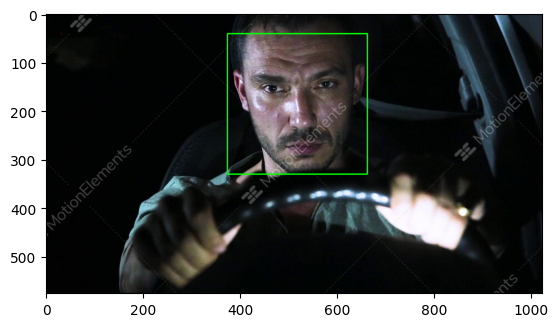

In [8]:
# Import the required libraries
import cv2

# Load the Haar Cascade classifiers
face_cascades = [
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml"),
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml"),
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_alt_tree.xml"),
    cv2.CascadeClassifier(r"C:\Users\ASUS\anaconda3\envs\tf\Lib\site-packages\cv2\data\haarcascade_frontalface_alt.xml")
]

image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image using multiple classifiers
faces = []
for face_cascade in face_cascades:
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
  if len(faces) > 0:
    break

# Draw a rectangle around each face
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image using matplotlib
plt.imshow(image)
plt.show()

    


# Conclusion:

All three models work well, but for our purpose we are going to use Haar Cascade face detection.
Haar Cascades in included with the cv2 library and does not require any extra package or module installations and thus is considered lightweight.